In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/traffic_accidents.csv')
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

In [ ]:
df.isnull().sum()

,0
crash_date,0
traffic_control_device,0
weather_condition,0
lighting_condition,0
first_crash_type,0
trafficway_type,0
alignment,0
roadway_surface_cond,0
road_defect,0
crash_type,0


In [ ]:
df.describe()

,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
count,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000
mean,2.063300,0.382717,0.001859,0.038102,0.221241,0.121516,2.244002,13.373047,4.144024,6.771822
std,0.396012,0.799720,0.047502,0.233964,0.614960,0.450865,1.241175,5.603830,1.966864,3.427593
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,4.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,10.000000
max,11.000000,21.000000,3.000000,7.000000,21.000000,15.000000,49.000000,23.000000,7.000000,12.000000


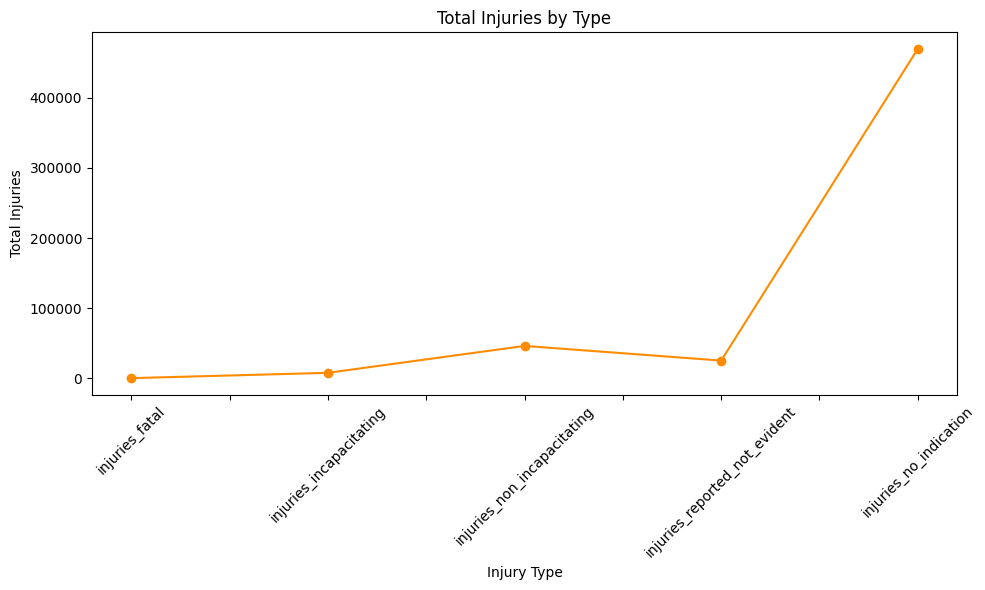

In [ ]:
injury_types = ['injuries_fatal', 'injuries_incapacitating', 'injuries_non_incapacitating',
                'injuries_reported_not_evident', 'injuries_no_indication']
injury_totals = df[injury_types].sum()


plt.figure(figsize=(10,6))
injury_totals.plot(kind='line', marker='o', color='darkorange')
plt.title('Total Injuries by Type')
plt.xlabel('Injury Type')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

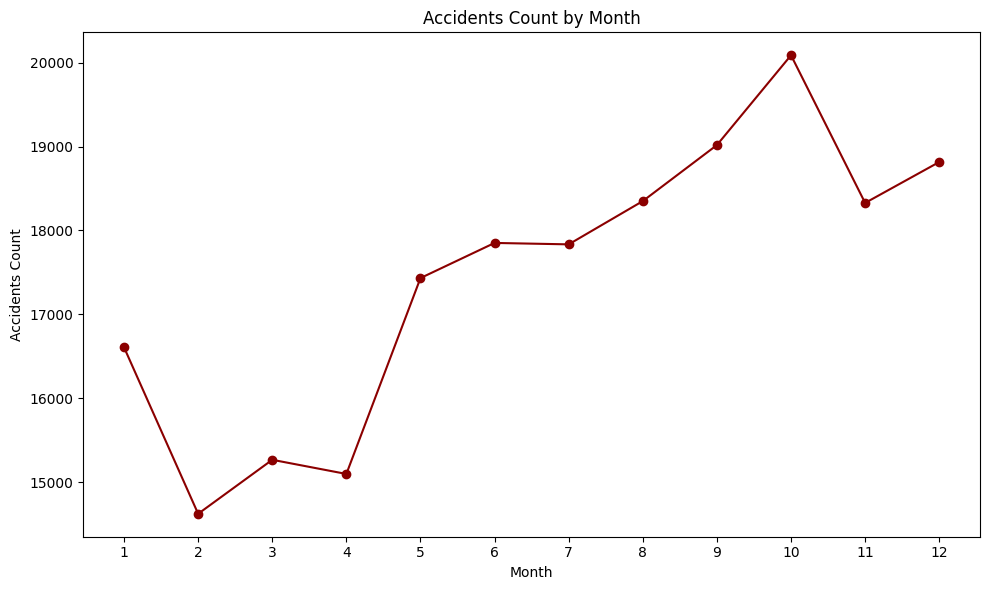

In [ ]:
accidents_by_month=df['crash_month'].value_counts().sort_index()
plt.figure(figsize=(10,6))
accidents_by_month.plot(kind='line', marker='o', color='darkred')
plt.title('Accidents Count by Month')
plt.xlabel('Month')
plt.xticks(range(1, 13))
plt.ylabel('Accidents Count')
plt.tight_layout()
plt.show()

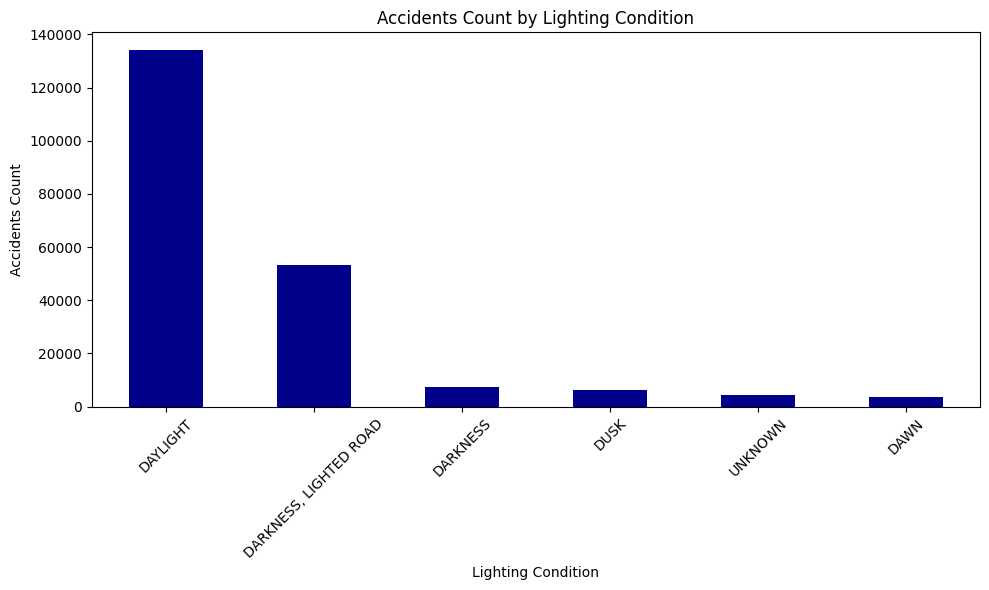

In [ ]:
accidents_by_lights=df['lighting_condition'].value_counts()
plt.figure(figsize=(10,6))
accidents_by_lights.plot(kind='bar',color='darkblue')
plt.title('Accidents Count by Lighting Condition')
plt.xlabel('Lighting Condition')
plt.ylabel('Accidents Count')
plt.xticks(rotation=45)
plt.tight_layout()

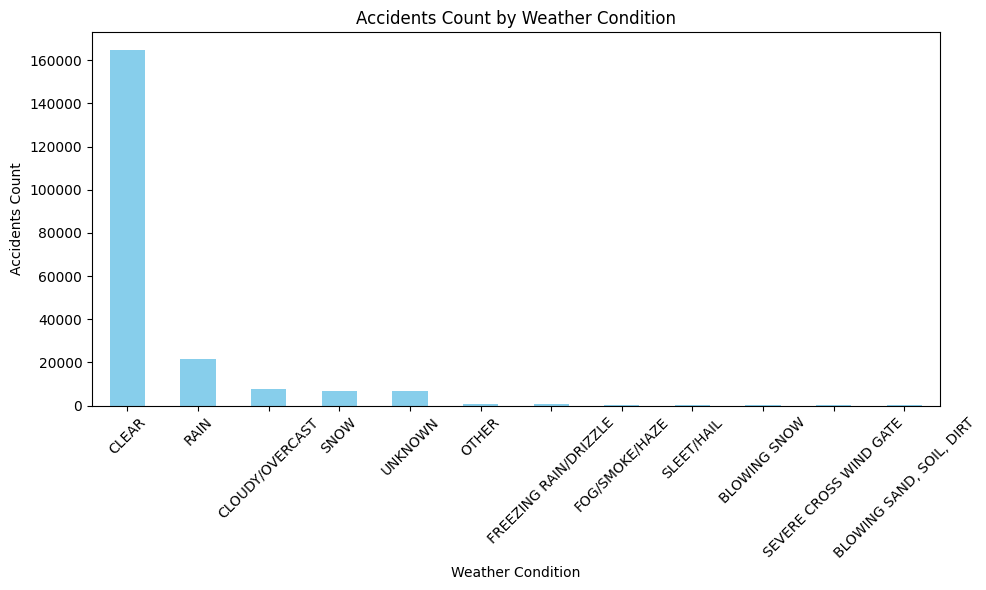

In [ ]:
accidents_by_weather = df['weather_condition'].value_counts()


plt.figure(figsize=(10,6))
accidents_by_weather.plot(kind='bar', color='skyblue')
plt.title('Accidents Count by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Accidents Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

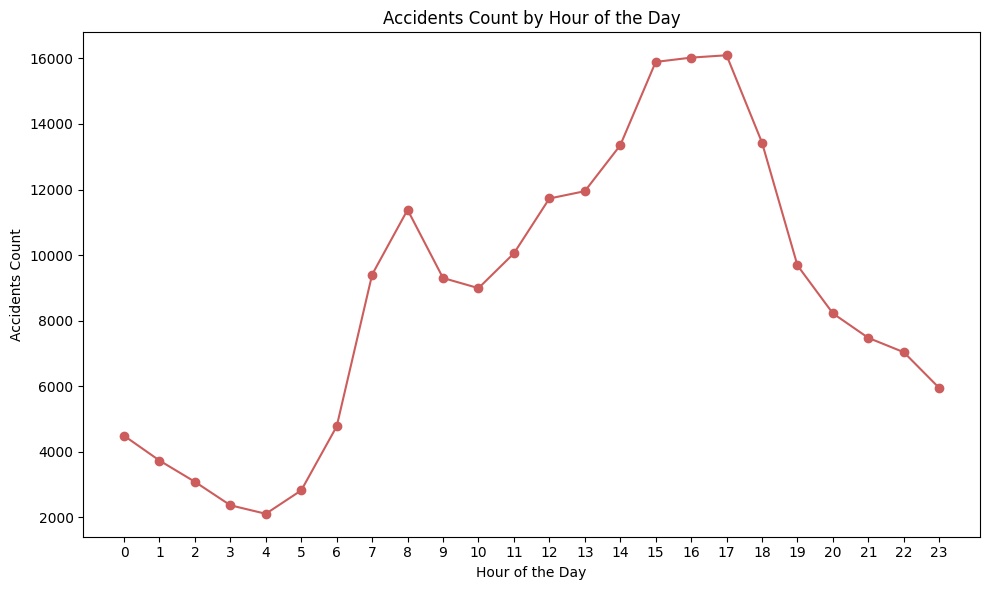

In [ ]:
accidents_by_hour = df['crash_hour'].value_counts().sort_index()


plt.figure(figsize=(10,6))
accidents_by_hour.plot(kind='line', marker='o', color='indianred')
plt.title('Accidents Count by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Accidents Count')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

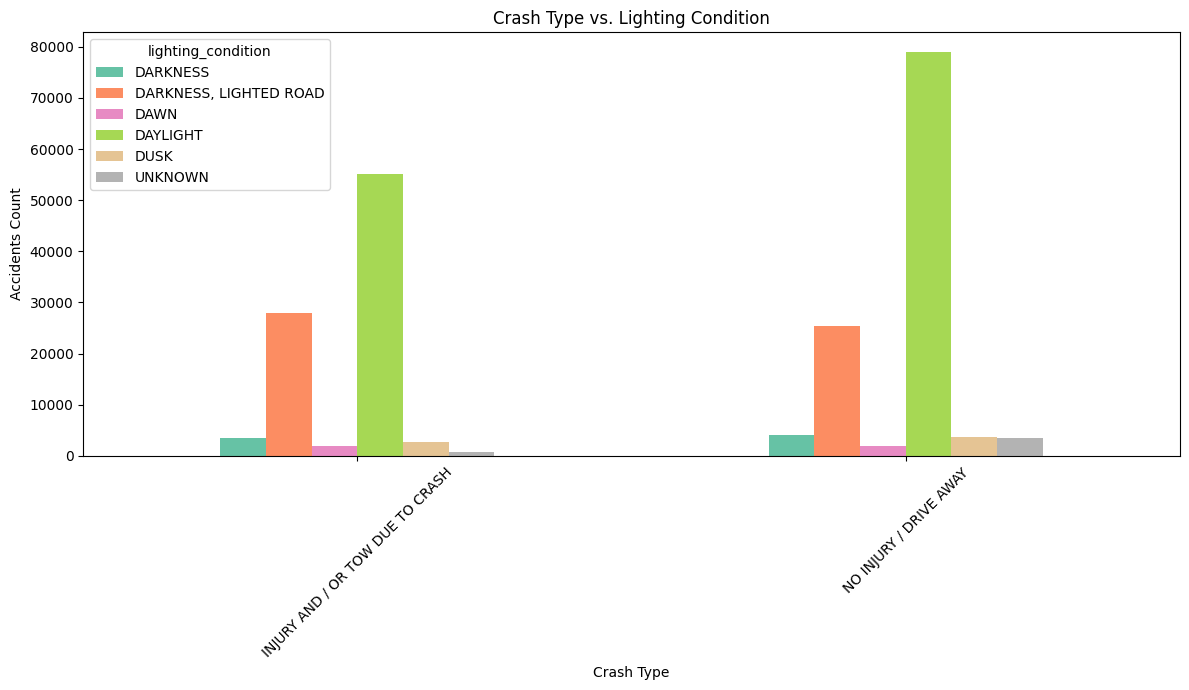

In [ ]:
accidents_by_crash_and_light = pd.crosstab(df['crash_type'], df['lighting_condition'])


accidents_by_crash_and_light.plot(kind='bar',  figsize=(12, 7), cmap='Set2')
plt.title('Crash Type vs. Lighting Condition')
plt.xlabel('Crash Type')
plt.ylabel('Accidents Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

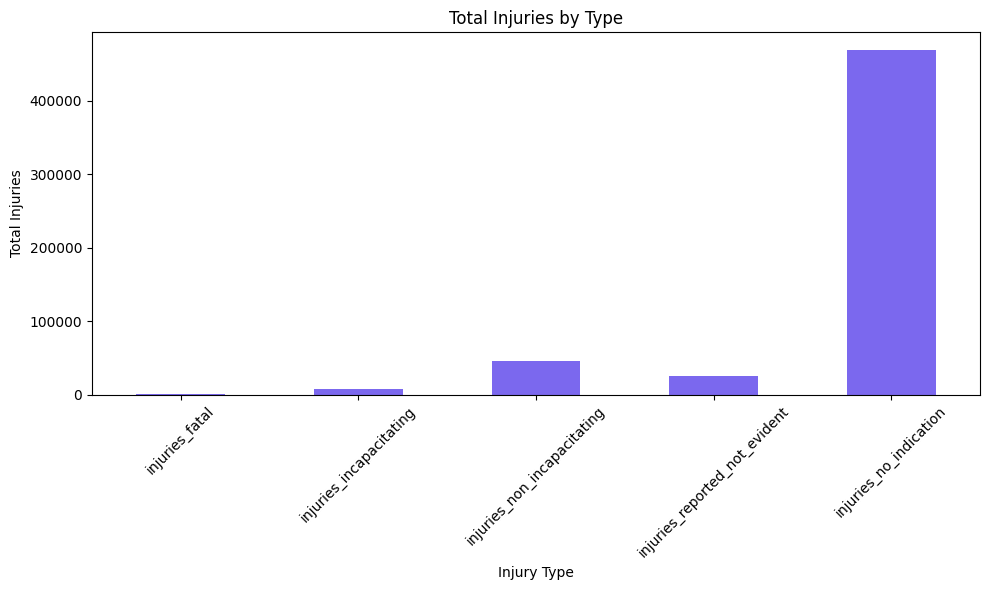

In [ ]:
injuries_by_type = df[injury_types].sum()


plt.figure(figsize=(10,6))
injuries_by_type.plot(kind='bar', color='mediumslateblue')
plt.title('Total Injuries by Type')
plt.xlabel('Injury Type')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

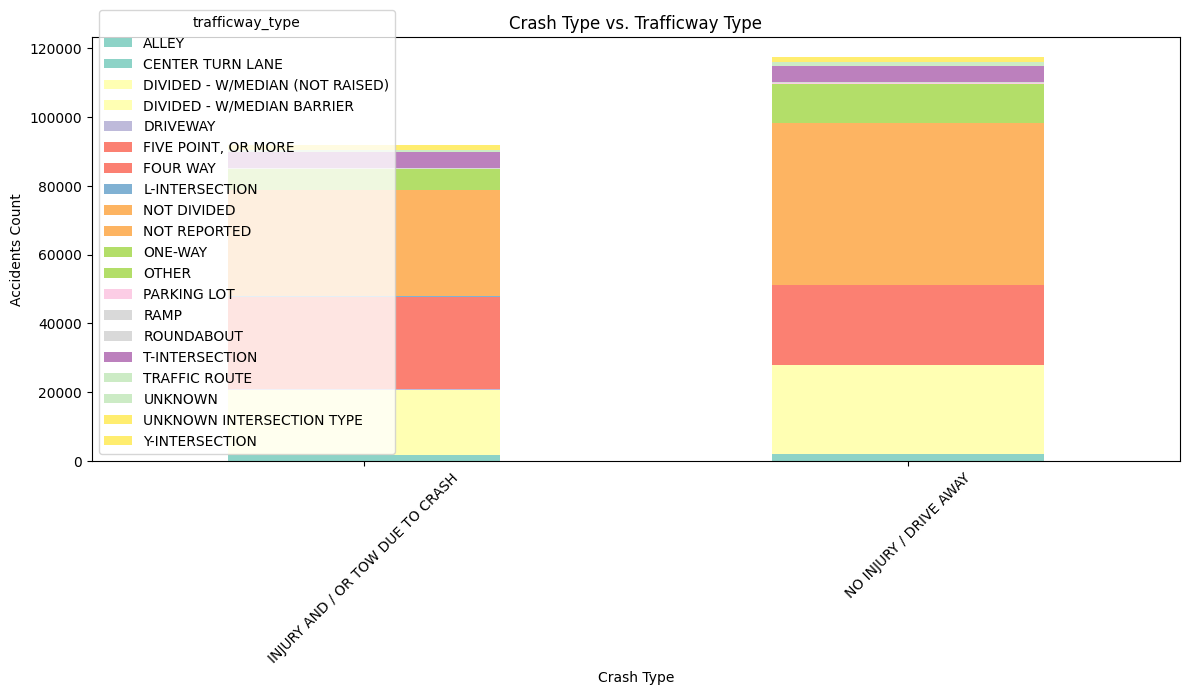

In [ ]:
accidents_by_crash_and_road = pd.crosstab(df['crash_type'], df['trafficway_type'])


accidents_by_crash_and_road.plot(kind='bar', stacked=True, figsize=(12, 7), cmap='Set3')
plt.title('Crash Type vs. Trafficway Type')
plt.xlabel('Crash Type')
plt.ylabel('Accidents Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

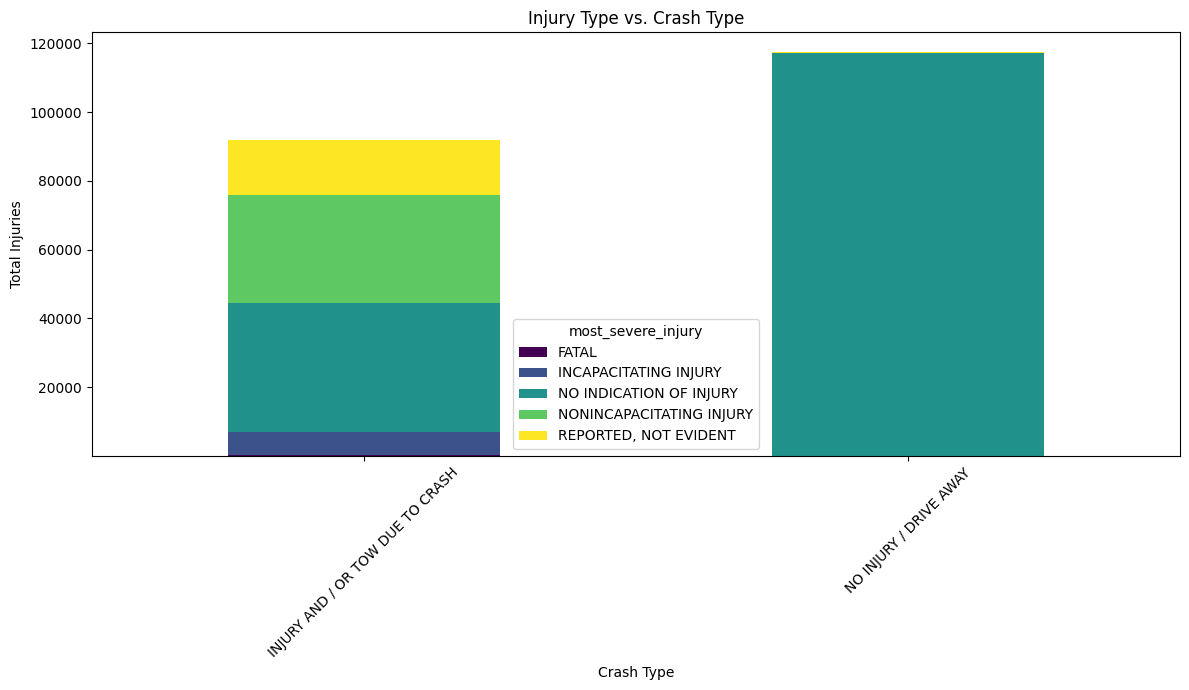

In [ ]:
injury_by_crash_type = pd.crosstab(df['crash_type'], df['most_severe_injury'])


injury_by_crash_type.plot(kind='bar', stacked=True, figsize=(12,7), cmap='viridis')
plt.title('Injury Type vs. Crash Type')
plt.xlabel('Crash Type')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# prompt: apply random forest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'most_severe_injury' is your target variable
# and you've already performed necessary preprocessing (handling missing values, encoding categorical features)
# Replace 'your_features' with the actual columns you want to use as features.

# Example feature selection (replace with your own feature engineering)
features = ['crash_hour', 'crash_month', 'lighting_condition', 'weather_condition', 'trafficway_type', 'crash_type']
X = df[features]
y = df['road_defect']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)  # drop_first to avoid multicollinearity

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust hyperparameters
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

                   precision    recall  f1-score   support

DEBRIS ON ROADWAY       0.00      0.00      0.00        24
       NO DEFECTS       0.85      0.97      0.91     34429
            OTHER       0.00      0.00      0.00       181
       RUT, HOLES       0.00      0.00      0.00       149
  SHOULDER DEFECT       0.00      0.00      0.00        74
          UNKNOWN       0.60      0.19      0.29      6792
     WORN SURFACE       0.00      0.00      0.00       213

         accuracy                           0.83     41862
        macro avg       0.21      0.17      0.17     41862
     weighted avg       0.79      0.83      0.79     41862

Accuracy: 0.8319239405666237
